***Importing necessary Packages***

In [1]:
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

***The below steps are used to get the dataset from Kaggle directly to Google Colaboratory***.<br>
***Refer this*** [link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) ***for more information.*** 

In [ ]:
from google.colab import files
files.upload()

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d virenbr11/pothole-and-plain-rode-images

100% 241M/241M [00:06<00:00, 54.6MB/s]
100% 241M/241M [00:06<00:00, 39.8MB/s]


***Unzipping dataset after downloading***

In [6]:
!unzip /content/pothole-and-plain-rode-images.zip

Archive:  /content/pothole-and-plain-rode-images.zip
  inflating: My Dataset/test/Plain/1.jpg  
  inflating: My Dataset/test/Plain/2.jpg  
  inflating: My Dataset/test/Plain/3.jpg  
  inflating: My Dataset/test/Plain/4.jpg  
  inflating: My Dataset/test/Plain/5.jpg  
  inflating: My Dataset/test/Plain/6.jpg  
  inflating: My Dataset/test/Plain/7.jpg  
  inflating: My Dataset/test/Plain/8.jpg  
  inflating: My Dataset/test/Pothole/1.jpg  
  inflating: My Dataset/test/Pothole/2.jpg  
  inflating: My Dataset/test/Pothole/3.jpg  
  inflating: My Dataset/test/Pothole/4.jpg  
  inflating: My Dataset/test/Pothole/5.jpg  
  inflating: My Dataset/test/Pothole/6.jpg  
  inflating: My Dataset/test/Pothole/7.jpg  
  inflating: My Dataset/test/Pothole/8.jpg  
  inflating: My Dataset/train/Plain/1.6.jpg  
  inflating: My Dataset/train/Plain/1.Longeststraight0.jpg  
  inflating: My Dataset/train/Plain/1.jpg  
  inflating: My Dataset/train/Plain/1.maxresdefault.jpg  
  inflating: My Dataset/train/Plai

***This callback function is used to stop training when the model reaches an accuracy of 99%. (It also prevents overfitting)***<br>
***Refer this [link](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) for more information on callback functions.***



In [7]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.99):
      print("\n 99% accuracy reached so cancelling training")
      self.model.stop_training=True

***Printing the count of how many images are there in the training and testing set.***

In [8]:
print(len(os.listdir('/content/My Dataset/train/Pothole/')))
print(len(os.listdir('/content/My Dataset/train/Plain/')))
print(len(os.listdir('/content/My Dataset/test/Pothole/')))
print(len(os.listdir('/content/My Dataset/test/Plain/')))
callbacks=mycallback()

357
367
8
8


***The next step is defining the model.<br> There are 4 convolutions and max-pooling layers. <br>The Relu activation function is used in the hidden layers and for the output layer Softmax is used. <br>[Why is Relu activation function choosen over sigmoid?](https://www.naukri.com/learning/articles/relu-and-sigmoid-activation-function/)***
<br><br>

***More about [Convolution](https://keras.io/api/layers/convolution_layers/convolution2d/), [Max-pooling](https://keras.io/api/layers/pooling_layers/max_pooling2d/), [Dense](https://keras.io/api/layers/core_layers/dense/), and [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) layers.<br>***




In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])


model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

***Keras image data generator is used for the generation of the batches containing the data of tensor images and is used in the domain of real-time data augmentation. We can loop over the data in batches when we make use of the image data generator in Keras. There are various methods and arguments of the image data generator class that helps to define the behavior of the data generation.***

In [11]:
train_dir = '/content/My Dataset/train'
train_datagen = ImageDataGenerator(rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 
val_dir = '/content/My Dataset/test'
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )
validation_generator =train_datagen.flow_from_directory(val_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 




Found 723 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


***Training the model.<br>
steps_per_epoch = number_of_images_in_training_set // batch_size <br>
validation_steps = number_of_images_in_testing_set // batch_size***

In [13]:
history = model.fit_generator(train_generator,
                              epochs=100,steps_per_epoch=723//16,
                              verbose=1,
                              validation_data=validation_generator,validation_steps=16//16,callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
45/45 [==============================] - 15s 346ms/step - loss: 0.1611 - acc: 0.4950 - val_loss: 1.1244 - val_acc: 0.5000
Epoch 2/100
45/45 [==============================] - 14s 314ms/step - loss: 0.1991 - acc: 0.4965 - val_loss: 0.9122 - val_acc: 0.5000
Epoch 3/100
45/45 [==============================] - 15s 329ms/step - loss: 0.1316 - acc: 0.4950 - val_loss: 1.0002 - val_acc: 0.5000
Epoch 4/100
45/45 [==============================] - 16s 357ms/step - loss: 0.1692 - acc: 0.4965 - val_loss: 0.8476 - val_acc: 0.5000
Epoch 5/100
45/45 [==============================] - 15s 333ms/step - loss: 0.1897 - acc: 0.4880 - val_loss: 0.7939 - val_acc: 0.5000
Epoch 6/100
45/45 [==============================] - 16s 366ms/step - loss: 0.1499 - acc: 0.4936 - val_loss: 0.8861 - val_acc: 0.5000
Epoch 7/100
45/45 [==============================] - 15s 327ms/step - loss: 0.1064 - acc: 0.4894 - val_loss: 1.5393 - val_acc: 0.5000
Epoch 8/100
45/45 [==============================] - 18s 400ms

***Prediction using own images.***

Saving 2.jpg to 2 (1).jpg
1/1 [==============================] - 0s 244ms/step
[1.]
2.jpg is a Obstacle


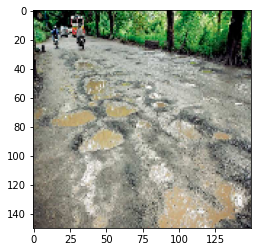

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt



uploaded = files.upload()

for fn in uploaded.keys():
 
 
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(150,150))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Pothole Image")
  else:
    print(fn + " is a Plain road Image")
  plt.imshow(img)
  plt.show()

In [17]:
train_pothole_dir = os.path.join('/content/My Dataset/train/Pothole')


train_plain_dir = os.path.join('/content/My Dataset/train/Plain')

***Plotting graph between Training accuracy and Validation accuracy.***

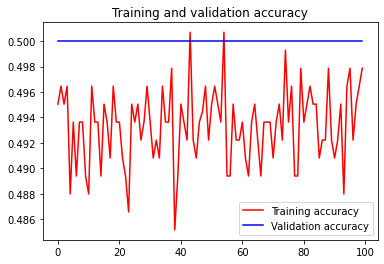

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [19]:
train_pothole_names = os.listdir(train_pothole_dir)
train_plain_names = os.listdir(train_plain_dir)

***The below code snippet is used to show the feature extracted when the image is passed through different layers in the model.***

1/1 [==============================] - 0s 312ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


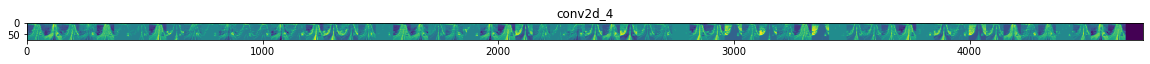

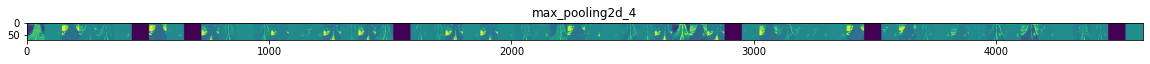

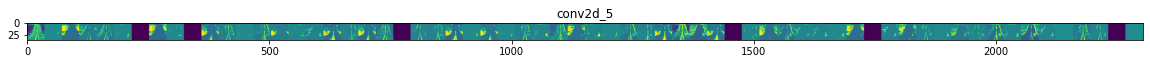

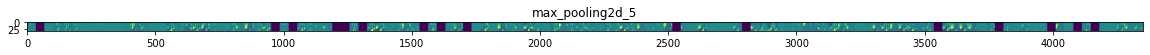

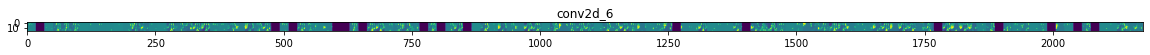

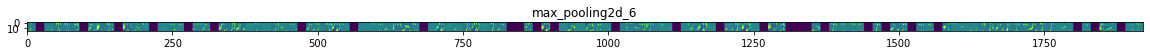

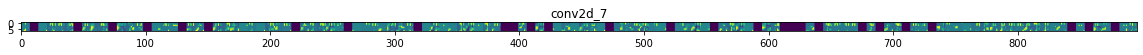

In [20]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt


successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

pothole_img_files = [os.path.join(train_pothole_dir, f) for f in train_pothole_names]
plain_img_files = [os.path.join(train_plain_dir, f) for f in train_plain_names]
img_path = random.choice(pothole_img_files + plain_img_files)

img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


x /= 255


successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  
   
    size = feature_map.shape[1]
 
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x
  
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')